In [30]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [18]:
data= pd.read_csv("D:\ML project\Firedata2015-2016.csv")
data= data.dropna()
print(data.shape)
print(list(data.columns))

(731, 16)
['Month', 'Dates', 'MaxTemp', 'AvgTemp', 'MinTemp', 'MaxDew', 'AvgDew', 'MinDew', 'MaxHumid', 'MinHumid', 'MaxWind', 'MinWind', 'MaxPressure', 'MinPressure', 'AvgPrecipitation', 'Class']


In [19]:
data.head()

,Month,Dates,MaxTemp,AvgTemp,MinTemp,MaxDew,AvgDew,MinDew,MaxHumid,MinHumid,MaxWind,MinWind,MaxPressure,MinPressure,AvgPrecipitation,Class
0,January,1/1/2015,59,50,41,37,32,26,66,33,12,0,30.19,30.10,0.0,0
1,January,1/2/2015,59,51,42,43,37,29,71,41,13,0,30.19,30.09,0.0,0
2,January,1/3/2015,62,54,45,45,41,36,71,49,13,0,30.30,30.17,0.0,0
3,January,1/4/2015,66,56,45,49,43,38,83,40,13,0,30.35,30.25,0.0,0
4,January,1/5/2015,76,62,48,47,38,27,83,17,8,0,30.25,30.13,0.0,0


In [20]:
data['Class'].value_counts()

0    702
1     29
Name: Class, dtype: int64

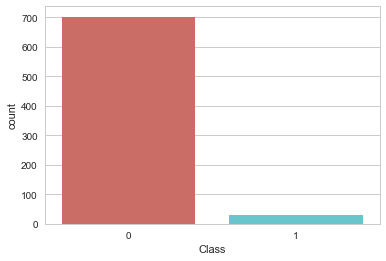

In [21]:
sns.countplot(x='Class',data=data,palette ='hls')
plt.show()


In [22]:
count_no_sub = len(data[data['Class']==0])
count_sub = len(data[data['Class']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no fire is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of fire", pct_of_sub*100)

percentage of no fire is 96.0328317373461
percentage of fire 3.9671682626538987


In [23]:
data.groupby('Class').mean()

,MaxTemp,AvgTemp,MinTemp,MaxDew,AvgDew,MinDew,MaxHumid,MinHumid,MaxWind,MinWind,MaxPressure,MinPressure,AvgPrecipitation
Class,,,,,,,,,,,,,
0,72.952991,66.894587,60.343305,56.766382,52.227920,47.025641,76.421652,47.864672,13.968661,0.455840,30.045442,29.947564,0.02208
1,81.551724,74.862069,67.482759,63.068966,59.241379,55.413793,79.793103,47.620690,13.655172,0.724138,29.972414,29.886207,0.00000


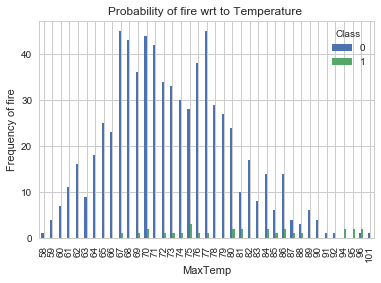

In [24]:
%matplotlib inline
pd.crosstab(data.MaxTemp,data.Class).plot(kind='bar')
plt.title('Probability of fire wrt to Temperature ')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency of fire')
plt.savefig('Probability of fire')

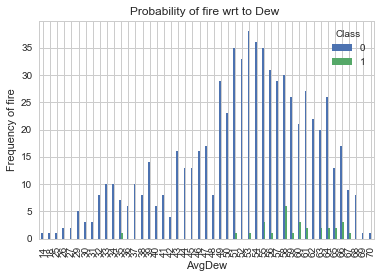

In [25]:
%matplotlib inline
pd.crosstab(data.AvgDew,data.Class).plot(kind='bar')
plt.title('Probability of fire wrt to Dew ')
plt.xlabel('AvgDew')
plt.ylabel('Frequency of fire')
plt.savefig('Probability of fire')

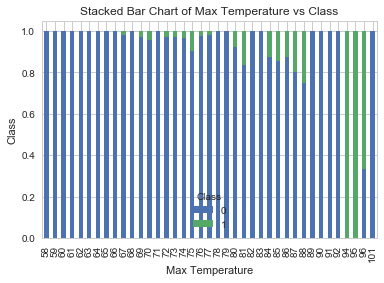

In [26]:
table=pd.crosstab(data.MaxTemp,data.Class)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Max Temperature vs Class')
plt.xlabel('Max Temperature')
plt.ylabel('Class')
plt.savefig('Max Temperature vs Class')

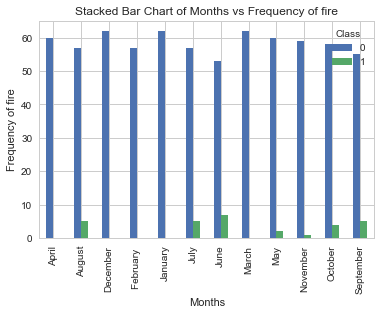

In [27]:
pd.crosstab(data.Month,data.Class).plot(kind='bar')
plt.title('Stacked Bar Chart of Months vs Frequency of fire')
plt.xlabel('Months')
plt.ylabel('Frequency of fire')
plt.savefig('Months vs Frequency of fire')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019544F38FD0>]],
      dtype=object)

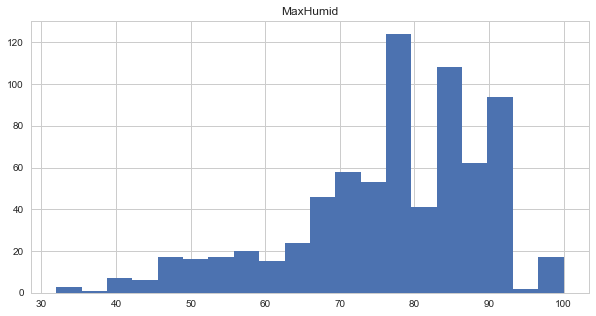

In [72]:
data.hist(column = 'MaxHumid',bins=20, figsize=(10,5))

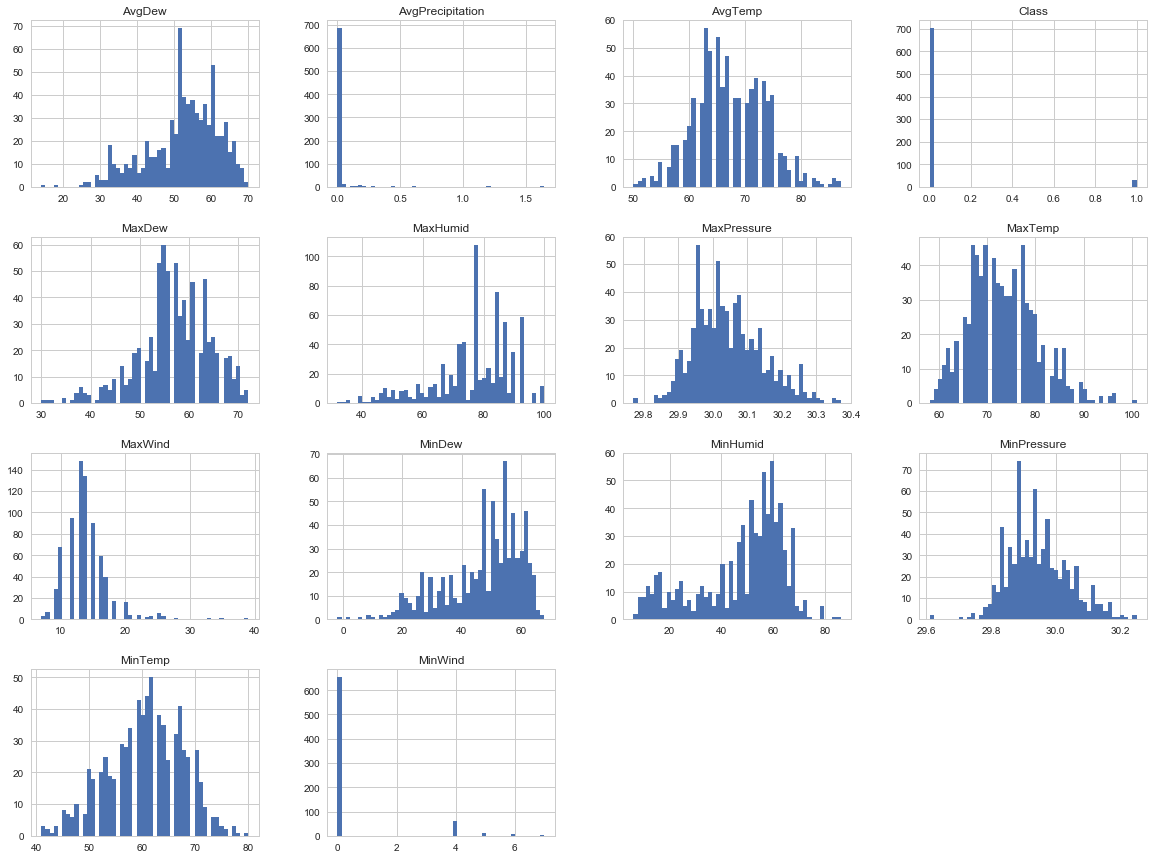

In [73]:
data.hist(bins = 50, figsize = (20,15))
plt.show()

In [33]:
data = data.drop(['Month'],1)

In [36]:
data = data.drop(['Dates'],1)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731 entries, 0 to 730
Data columns (total 14 columns):
MaxTemp             731 non-null int64
AvgTemp             731 non-null int64
MinTemp             731 non-null int64
MaxDew              731 non-null int64
AvgDew              731 non-null int64
MinDew              731 non-null int64
MaxHumid            731 non-null int64
MinHumid            731 non-null int64
MaxWind             731 non-null int64
MinWind             731 non-null int64
MaxPressure         731 non-null float64
MinPressure         731 non-null float64
AvgPrecipitation    731 non-null float64
Class               731 non-null int64
dtypes: float64(3), int64(11)
memory usage: 105.7 KB


In [63]:
X = data.loc[:, data.columns != 'Class']
y = data.loc[:, data.columns == 'Class']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Class'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no fire in oversampled data",len(os_data_y[os_data_y['Class']==0]))
print("Number of  fire in oversampled data",len(os_data_y[os_data_y['Class']==1]))
#rint("Number of Fire ",len(os_data_y(os_data_y['Class']==1))
print("Proportion of no fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==0])/len(os_data_X))
print("Proportion of  fire data in oversampled data is ",len(os_data_y[os_data_y['Class']==1])/len(os_data_X))
#rint("Proportion of fire data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))



length of oversampled data is  980
Number of no fire in oversampled data 490
Number of  fire in oversampled data 490
Proportion of no fire data in oversampled data is  0.5
Proportion of  fire data in oversampled data is  0.5


C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [64]:
data_final_vars=data.columns.values.tolist()
y=['Class']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1 1 1 1 1 1 1 1 1 1 1 1 1]


C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [65]:
cols=['MaxTemp','MinTemp','MaxDew','MaxDew','MinDew','MaxHumid','MinHumid','MaxWind','MinWind','MaxPressure','MinPressure','AvgPrecipitation']
X=os_data_X[cols]
y=os_data_y['Class']

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\aksha\Anaconda3\envs\tensorflow1\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [68]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [69]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[114  34]
 [ 20 126]]


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81       148
           1       0.79      0.86      0.82       146

   micro avg       0.82      0.82      0.82       294
   macro avg       0.82      0.82      0.82       294
weighted avg       0.82      0.82      0.82       294



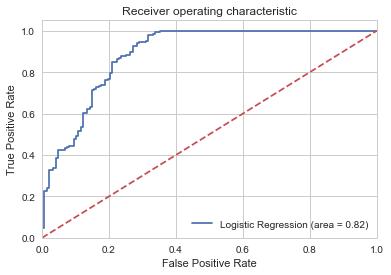

In [71]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()